##**SymBeam playground**
[SymBeam](https://github.com/amcc1996/symbeam) is a pedagogical Python package for bending diagrams computation, aimed at Mechanical, Civil and Industrial Engineering students.
If you are not familiar with SymBeam yet, check the [main page](https://github.com/amcc1996/symbeam) to learn more on its features, usage and numerous examples.

This interactive Jupyter Python Notebook serves the purpose of providing an easy access-point to SymBeam capabilities for students not so comfortable to Python computational enviroment, so that they can equally take advantage of this tool for their study.

The sections below have been structured to encompass a sufficiently comprehensive range of SymBeam's useful features which shall hopefully suffice for the study of several students. In any case, if you have suggestions for improving SymBeam or found some limitation, please visit the [project page](https://github.com/amcc1996/symbeam) or contact [me](https://github.com/amcc1996/symbeam/blob/master/SUPPORT.md)!


###**How to use this notebook**
The notebook is divided into text and code sections. The text blocks are uniquely informative. They are essentially aimed at explaining the syntax and the available options. If by mistake you start editing one, just click elsewhere in the notebook or press ESC.

The code blocks can be executed each one at a time. To run a block o code just hover over the code and a triangular button will appear on the top left corner (similar to a play or run button). If you click in this button the associated code will be executed and the respective output is shown. Note that while the button is animated, the code is still running. The output can be hidden by clicking in the button below the run button.

Always start by running the code in **Installing and importing SymBeam** and finish by executing **Solve the problem and plot the results**.

If you make some alteration in a code block, make sure to run every following block to avoid unexpected behaviour.

### **Installing and importing SymBeam** 
The code below does the following:
 1. Installs SymBeam Python Package; this step might take some time in the first run or if some reloading is required.
 2. Configures the plotting library to show the images in the correct place.
 3. Imports `symbeam` into the system, making it available. 

 **Warning** - These lines are simple formalities but are mandatory to setup a proper environment. Do not change them unless you are aware of the consequences.

In [1]:
!pip3 install symbeam
% matplotlib inline
from symbeam import beam

### **Define the length of the beam**
A new beam called `new` is created in the line below, just insert the beam length inside `beam( )`. It can be a number or string.



In [2]:
new = beam('L')

### **Add supports**
Add the fixture supports of the beam here, one line of for each constraint. Note hat SymBeam can only deal with statically determinate beams, so redundant supports are not handled. The syntax is as follows

The first argument is the coordinate of the support and the second is the type. The available types are"
* `pin`
* `roller`
* `hinge`
* `fixed`


In [3]:
new.add_support(0, 'fixed')
new.add_support('L/2', 'hinge')
new.add_support('3*L/4', 'roller')

### **Add loads**
Apply external loads to the beam. These can be
* Point forces - `add_point_load(coordinate, value)`
* Point moments - `add_point_moment(coordinate, value)`
* Distributed forces - `add_distributed_load(start, end, expression`

In [4]:
new.add_point_load('L', '-P')
new.add_point_moment('L/4', 'P*L')
new.add_distributed_load(0, 'L/2', '-P * x / L')

### **Solve the problem and plot the results**
These last two lines of code call the solver, print reaction forces and moments, the shear force and bending moment diagrams, and the slope and deflection expressions for the problem at hand. Additionally, it plots the results in a fancy figure.

**Warning** - The following lines do all the work in SymBeam. Be careful with modifying or removing them, as you will incur is a severe loss of utility of SymBeam.

In [5]:
new.solve()


                                    Beam points                                    
     Coordinate              Type                 Load                Moment       
-----------------------------------------------------------------------------------
         0                  Fixed                  0                    0          
        L/4            Continuity point            0                   L*P         
        L/2                 Hinge                  0                    0          
       3*L/4                Roller                 0                    0          
         L             Continuity point            -P                   0          


                                   Beam segments                                   
        Span            Young modulus           Inertia          Distributed load  
-----------------------------------------------------------------------------------
 [   0   -  L/4  ]            E                    I                  -P*

(<Figure size 504x576 with 4 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:ylabel='Shear force, $V(x)$'>,
        <AxesSubplot:ylabel='Bending moment, $M(x)$'>,
        <AxesSubplot:xlabel='Coordinate, $x$', ylabel='Deflection, $v(x)$'>],
       dtype=object))

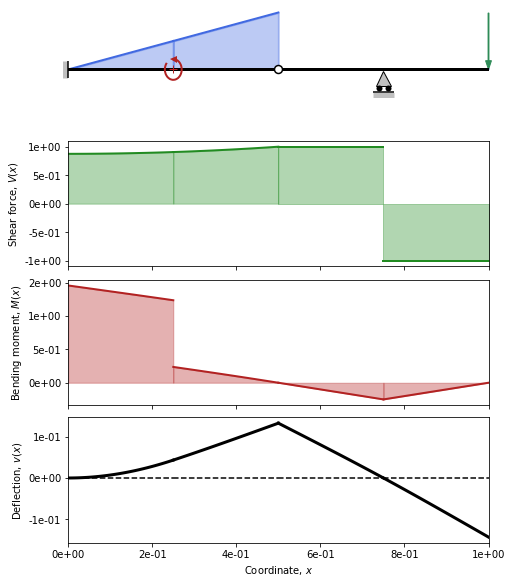

In [6]:
new.plot()